In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast # To safely evaluate string-formatted lists

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

In [2]:
df = pd.read_csv('intern_data_ikarus.csv')
print(df.head())

                                               title            brand  \
0  GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...           GOYMFK   
1  subrtex Leather ding Room, Dining Chairs Set o...          subrtex   
2  Plant Repotting Mat MUYETOL Waterproof Transpl...          MUYETOL   
3  Pickleball Doormat, Welcome Doormat Absorbent ...          VEWETOL   
4  JOIN IRON Foldable TV Trays for Eating Set of ...  JOIN IRON Store   

                                         description   price  \
0  multiple shoes, coats, hats, and other items E...  $24.99   
1                     subrtex Dining chairs Set of 2     NaN   
2                                                NaN   $5.98   
3  The decorative doormat features a subtle textu...  $13.99   
4  Set of Four Folding Trays With Matching Storag...  $89.99   

                                          categories  \
0  ['Home & Kitchen', 'Storage & Organization', '...   
1  ['Home & Kitchen', 'Furniture', 'Dining Room F...   
2  ['Pat

In [3]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               312 non-null    object
 1   brand               312 non-null    object
 2   description         159 non-null    object
 3   price               215 non-null    object
 4   categories          312 non-null    object
 5   images              312 non-null    object
 6   manufacturer        205 non-null    object
 7   package_dimensions  306 non-null    object
 8   country_of_origin   125 non-null    object
 9   material            218 non-null    object
 10  color               265 non-null    object
 11  uniq_id             312 non-null    object
dtypes: object(12)
memory usage: 29.4+ KB


In [4]:
# Fill NaN values in object columns with an empty string
for col in ['description', 'brand', 'manufacturer', 'country_of_origin', 'material', 'color']:
    df[col] = df[col].fillna('')

# Clean and convert 'price' column
# Remove '$' and convert to numeric, coercing errors to NaN
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Fill missing prices with the median price
median_price = df['price'].median()
df['price'] = df['price'].fillna(median_price)

# Check the dtypes and missing values again
print("Cleaned Dataset Information:")
df.info()

print("\nPrice column after cleaning:")
print(df['price'].describe())

Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               312 non-null    object 
 1   brand               312 non-null    object 
 2   description         312 non-null    object 
 3   price               312 non-null    float64
 4   categories          312 non-null    object 
 5   images              312 non-null    object 
 6   manufacturer        312 non-null    object 
 7   package_dimensions  306 non-null    object 
 8   country_of_origin   312 non-null    object 
 9   material            312 non-null    object 
 10  color               312 non-null    object 
 11  uniq_id             312 non-null    object 
dtypes: float64(1), object(11)
memory usage: 29.4+ KB

Price column after cleaning:
count    312.000000
mean      63.389808
std       48.494837
min        0.600000
25%       37.115

In [5]:
# Safely parse the 'categories' string
def parse_categories(cat_str):
    try:
        # The string looks like "['Home & Kitchen', ...]", so ast.literal_eval is perfect
        cat_list = ast.literal_eval(cat_str)
        return ' '.join(cat_list)
    except (ValueError, SyntaxError):
        # Return empty string if parsing fails
        return ''

df['categories_str'] = df['categories'].apply(parse_categories)

# Create the combined feature for embedding
df['combined_text'] = (
    df['title'].astype(str) + ' | ' +
    df['brand'].astype(str) + ' | ' +
    df['description'].astype(str) + ' | ' +
    df['categories_str'].astype(str) + ' | ' +
    df['material'].astype(str) + ' | ' +
    df['color'].astype(str)
)

print("Sample of the combined_text feature:")
print(df[['title', 'combined_text']].head())

Sample of the combined_text feature:
                                               title  \
0  GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...   
1  subrtex Leather ding Room, Dining Chairs Set o...   
2  Plant Repotting Mat MUYETOL Waterproof Transpl...   
3  Pickleball Doormat, Welcome Doormat Absorbent ...   
4  JOIN IRON Foldable TV Trays for Eating Set of ...   

                                       combined_text  
0  GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...  
1  subrtex Leather ding Room, Dining Chairs Set o...  
2  Plant Repotting Mat MUYETOL Waterproof Transpl...  
3  Pickleball Doormat, Welcome Doormat Absorbent ...  
4  JOIN IRON Foldable TV Trays for Eating Set of ...  


## 5. Exploratory Data Analysis (EDA)

Now that the data is clean, we can create some visualizations to understand the dataset better. These insights will be displayed on the analytics page of our web app.

Generated price_distribution.png


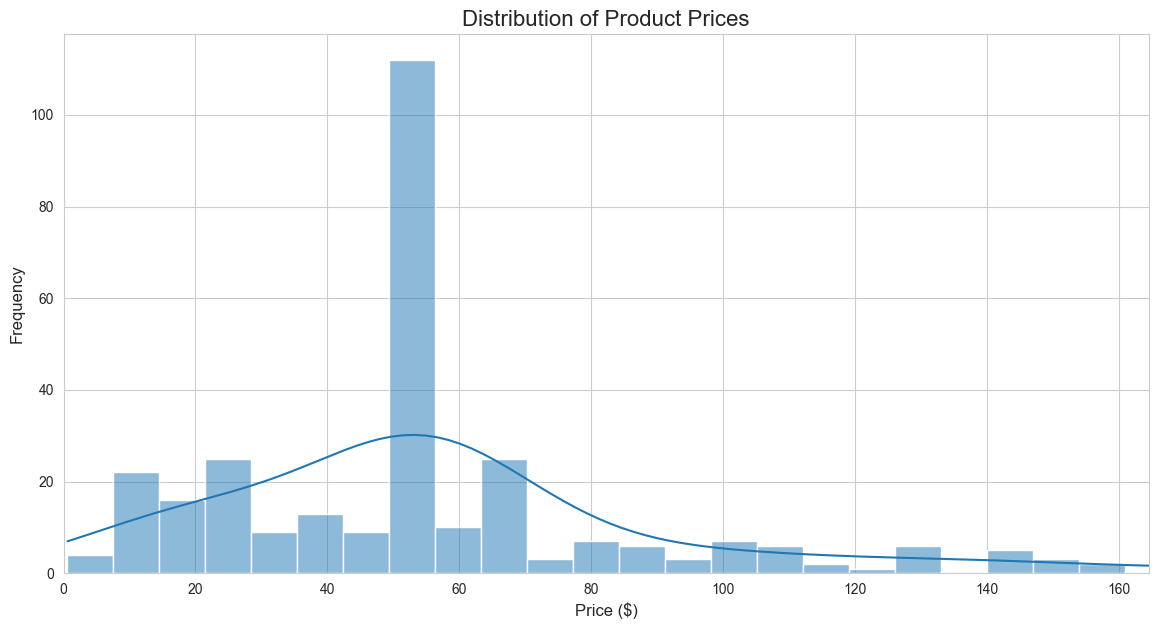

In [6]:
# Plotting the distribution of prices
plt.figure(figsize=(14, 7))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, df['price'].quantile(0.95)) # Limiting x-axis to 95th percentile for better readability
plt.savefig('price_distribution.png')
print("Generated price_distribution.png")
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_1092\1848408402.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_brands.values, y=top_10_brands.index, palette='viridis', orient='h')


Generated top_brands.png


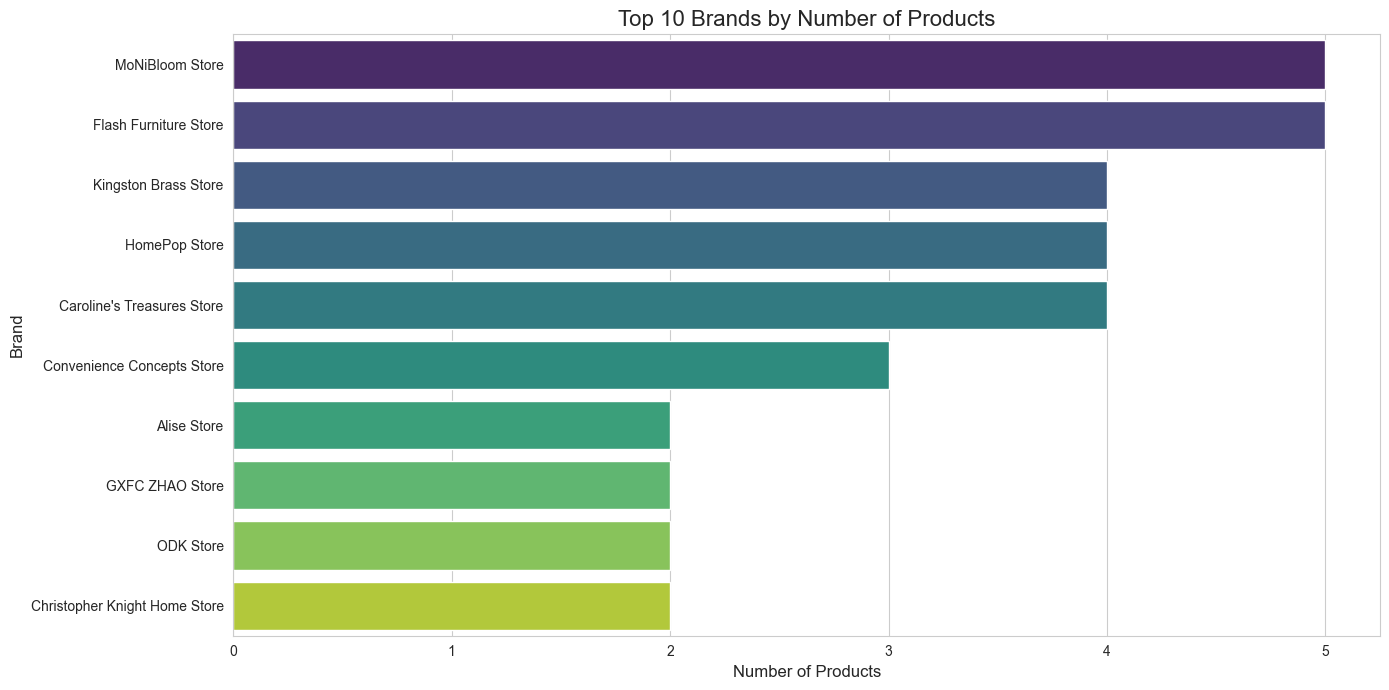

In [7]:
# Plotting the top 10 brands
top_10_brands = df['brand'].value_counts().nlargest(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_brands.values, y=top_10_brands.index, palette='viridis', orient='h')
plt.title('Top 10 Brands by Number of Products', fontsize=16)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.savefig('top_brands.png')
print("Generated top_brands.png")
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_1092\3293430124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_materials.values, y=top_10_materials.index, palette='plasma', orient='h')


Generated top_materials.png


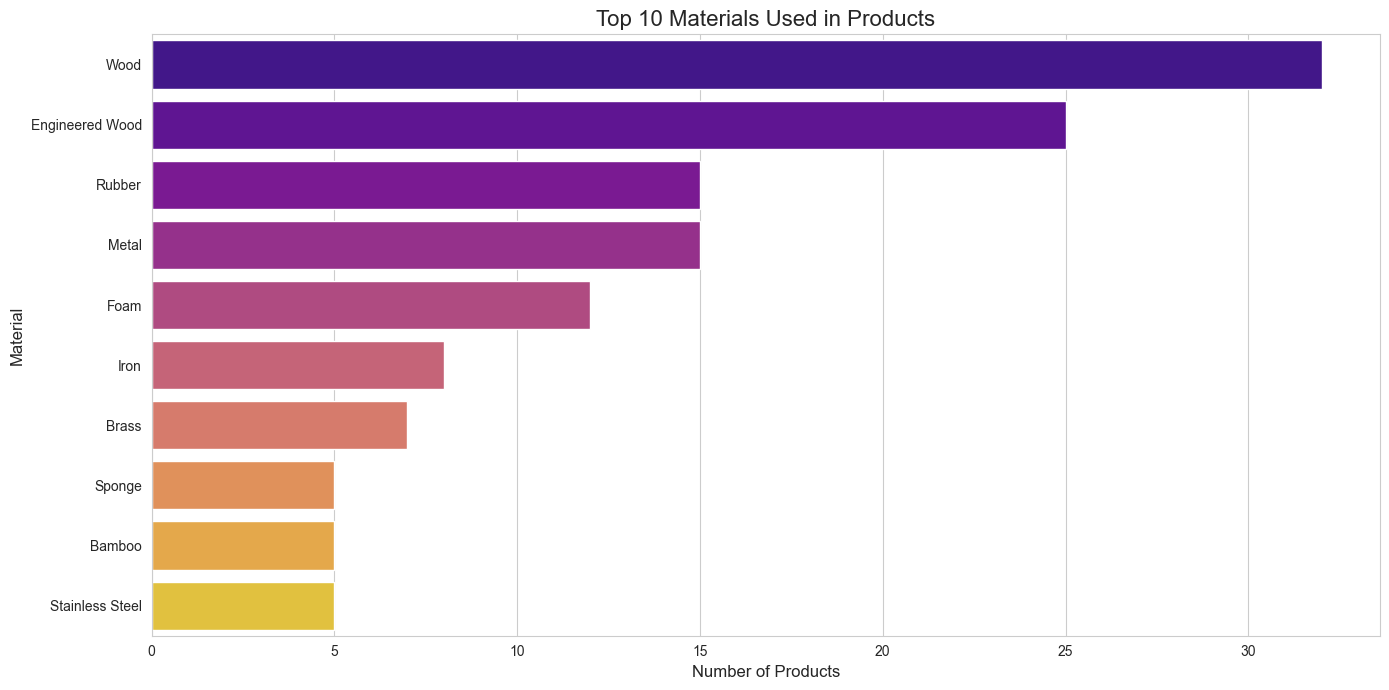

In [8]:
# Plotting the top 10 materials
# Filter out empty strings first
top_10_materials = df[df['material'] != '']['material'].value_counts().nlargest(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_materials.values, y=top_10_materials.index, palette='plasma', orient='h')
plt.title('Top 10 Materials Used in Products', fontsize=16)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Material', fontsize=12)
plt.tight_layout()
plt.savefig('top_materials.png')
print("Generated top_materials.png")
plt.show()

## 6. Export Data for Application

Finally, we'll save our cleaned data to a new CSV file for the model training phase. We will also save the aggregated data for our charts into a JSON file, which the FastAPI backend can easily serve to the frontend.

In [9]:
# 1. Save the cleaned DataFrame
# We select only the necessary columns to keep the file size minimal for the next step.
columns_to_keep = [
    'uniq_id', 'title', 'brand', 'price', 'images',
    'categories', 'material', 'color', 'combined_text'
]
cleaned_df = df[columns_to_keep]
cleaned_df.to_csv('cleaned_data.csv', index=False)
print("Cleaned data saved to 'cleaned_data.csv'")

# 2. Prepare and save analytics data as JSON
# Note: Converting numpy types to native Python types for JSON serialization
analytics_data = {
    'price_distribution': {
        'prices': df[df['price'] < df['price'].quantile(0.95)]['price'].tolist() # Send sample for histogram
    },
    'top_brands': {
        'brands': top_10_brands.index.tolist(),
        'counts': [int(c) for c in top_10_brands.values]
    },
    'top_materials': {
        'materials': top_10_materials.index.tolist(),
        'counts': [int(c) for c in top_10_materials.values]
    }
}

with open('analytics_data.json', 'w') as f:
    json.dump(analytics_data, f, indent=4)

print("\nAnalytics data saved to 'analytics_data.json'")
print("\n--- JSON Content ---")
print(json.dumps(analytics_data, indent=2))

Cleaned data saved to 'cleaned_data.csv'

Analytics data saved to 'analytics_data.json'

--- JSON Content ---
{
  "price_distribution": {
    "prices": [
      24.99,
      53.99,
      5.98,
      13.99,
      89.99,
      53.99,
      63.99,
      24.99,
      53.99,
      5.98,
      13.99,
      89.99,
      53.99,
      63.99,
      39.99,
      53.99,
      53.99,
      46.99,
      53.99,
      53.99,
      53.99,
      53.99,
      53.99,
      53.99,
      53.99,
      18.99,
      79.99,
      13.99,
      53.99,
      140.0,
      69.99,
      53.99,
      53.99,
      16.59,
      8.99,
      49.99,
      53.99,
      54.99,
      16.99,
      24.88,
      64.99,
      69.0,
      89.98,
      53.99,
      15.99,
      159.99,
      18.99,
      13.9,
      53.99,
      143.98,
      69.99,
      95.99,
      39.99,
      53.99,
      53.99,
      55.99,
      17.99,
      53.99,
      53.99,
      69.91,
      24.97,
      53.99,
      65.99,
      53.99,
      27.99,
    